# 分析K近邻算法的错误率

### 1. 准备数据集

- Iris

In [4]:
#Iris 数据集

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 

print('Iris shapes:', X.shape, y.shape)  # (150, 4) (150, 1)
print(X.head())
print(y.head())
print(y.value_counts())
# 转为 numpy 方便后续计算
X_iris = X.values
y_iris = y.values.ravel()
# print(X_iris)
# print(y_iris)

Iris shapes: (150, 4) (150, 1)
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa
class          
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


- Sonar

In [5]:
# Sonar 数据集
# fetch dataset 
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151) 
  
# data (as pandas dataframes) 
X = connectionist_bench_sonar_mines_vs_rocks.data.features 
y = connectionist_bench_sonar_mines_vs_rocks.data.targets 

X_sonar = X.values
y_sonar = y.values.ravel()
print("Sonar shapes:", X_sonar.shape, y_sonar.shape)


Sonar shapes: (208, 60) (208,)


- MNIST

In [6]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root='data', train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(root='data', train=False, download=True, transform=transform)

X_mnist_train = mnist_train.data.numpy().reshape(len(mnist_train), -1)
y_mnist_train = mnist_train.targets.numpy()
X_mnist_test = mnist_test.data.numpy().reshape(len(mnist_test), -1)
y_mnist_test = mnist_test.targets.numpy()

print("MNIST shapes:", X_mnist_train.shape, y_mnist_train.shape, X_mnist_test.shape, y_mnist_test.shape)


MNIST shapes: (60000, 784) (60000,) (10000, 784) (10000,)


- CIFAR-10

In [7]:
from torchvision import datasets, transforms
import numpy as np

transform = transforms.Compose([transforms.ToTensor()])
cifar_train = datasets.CIFAR10(root='data', train=True, download=True, transform=transform)
cifar_test = datasets.CIFAR10(root='data', train=False, download=True, transform=transform)

X_cifar_train = cifar_train.data.reshape(len(cifar_train), -1)
y_cifar_train = np.array(cifar_train.targets)
X_cifar_test = cifar_test.data.reshape(len(cifar_test), -1)
y_cifar_test = np.array(cifar_test.targets)

print("CIFAR shapes:", X_cifar_train.shape, y_cifar_train.shape, X_cifar_test.shape, y_cifar_test.shape)


CIFAR shapes: (50000, 3072) (50000,) (10000, 3072) (10000,)


- UCM（UC Merced）

In [60]:
from torchvision import datasets, transforms
import numpy as np

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
ucm_dataset = datasets.ImageFolder(root='./data/UCMerced_LandUse/Images', transform=transform)

X_ucm = np.array([x[0].numpy().flatten() for x in ucm_dataset])
y_ucm = np.array([x[1] for x in ucm_dataset])

print("UCM shapes:", X_ucm.shape, y_ucm.shape)


UCM shapes: (2100, 49152) (2100,)


### 2.k值不同时，各个数据集的错误率

- Iris

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [10]:
# 划分训练集和测试集（70%训练，30%测试）
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

# 标准化（很重要，KNN 对特征量纲敏感）
scaler_iris = StandardScaler()
X_train_iris = scaler_iris.fit_transform(X_train_iris)
X_test_iris = scaler_iris.transform(X_test_iris)

print("训练集大小:", X_train_iris.shape)
print("测试集大小:", X_test_iris.shape)


训练集大小: (105, 4)
测试集大小: (45, 4)


#### Iris 不同 K 值下计算错误率(K = 1,2,3...15),  先默认使用欧氏距离

In [ ]:
def calculate_error_rates(X_train, y_train, X_test, y_test, max_k=15, metric='minkowski'):

    error_rates = []
    k_values = range(1, max_k + 1)
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, y_pred)
        error_rates.append(error_rate)
        # 输出结果
    for k, e in zip(k_values, error_rates):
        print(f"k={k}: 错误率={e:.4f}")
    return k_values, error_rates

In [36]:
k_values, error_rates =  calculate_error_rates(X_train_iris, y_train_iris, X_test_iris, y_test_iris, max_k=15)

k=1: 错误率=0.0222
k=2: 错误率=0.0222
k=3: 错误率=0.0000
k=4: 错误率=0.0222
k=5: 错误率=0.0000
k=6: 错误率=0.0000
k=7: 错误率=0.0000
k=8: 错误率=0.0000
k=9: 错误率=0.0000
k=10: 错误率=0.0000
k=11: 错误率=0.0000
k=12: 错误率=0.0000
k=13: 错误率=0.0000
k=14: 错误率=0.0000
k=15: 错误率=0.0000


In [37]:
def plot_error_rates(k_values, error_rates):
  #绘制错误率变化曲线
  fig, ax = plt.subplots(figsize=(8,5))
  ax.plot(k_values, error_rates, marker='o')
  ax.set_xlabel('K value')
  ax.set_ylabel('error rate')
  plt.show()

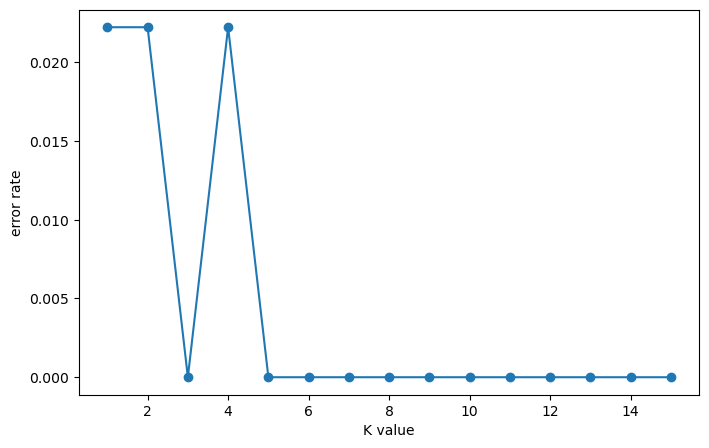

In [38]:
plot_error_rates(k_values, error_rates)

这里用Iris数据集跑出来的结果好像不太符合预期，我觉得应该是Iris数据集太简单了吧，KNN很容易就能分类成功。
用别的数据集看看

In [39]:
X_train_Sonar, X_test_Sonar, y_train_Sonar, y_test_Sonar = train_test_split(
    X_sonar, y_sonar, test_size=0.3, random_state=42
)

scaler_Sonar = StandardScaler()
X_train_Sonar = scaler_Sonar.fit_transform(X_train_Sonar)
X_test_Sonar = scaler_Sonar.transform(X_test_Sonar)
print("训练集大小:", X_train_Sonar.shape)
print("测试集大小:", X_test_Sonar.shape)

训练集大小: (145, 60)
测试集大小: (63, 60)


In [40]:
k_values, error_rates = calculate_error_rates(X_train_Sonar, y_train_Sonar, X_test_Sonar, y_test_Sonar, max_k=15)

k=1: 错误率=0.0635
k=2: 错误率=0.1111
k=3: 错误率=0.0794
k=4: 错误率=0.1270
k=5: 错误率=0.1111
k=6: 错误率=0.1270
k=7: 错误率=0.1746
k=8: 错误率=0.1746
k=9: 错误率=0.1746
k=10: 错误率=0.2381
k=11: 错误率=0.2222
k=12: 错误率=0.2381
k=13: 错误率=0.2222
k=14: 错误率=0.2222
k=15: 错误率=0.2063


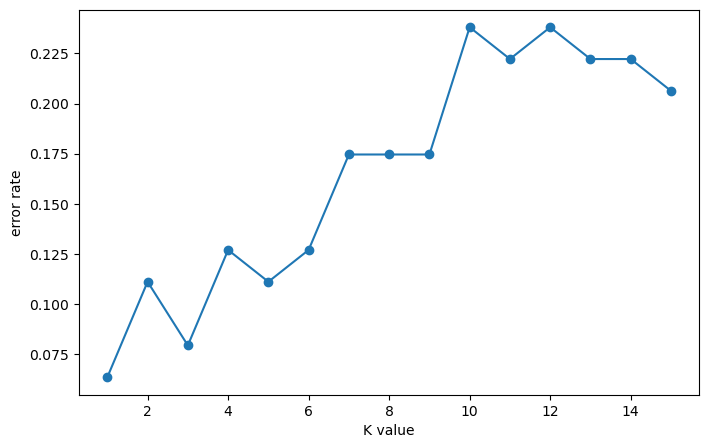

In [41]:
plot_error_rates(k_values, error_rates)

从图中可知，在 Sonar 数据集中，KNN 模型在 K=1~3 之间表现较好，随着 K 增大，错误率逐渐上升。
说明较小的 K 值有助于捕捉数据的局部特征，而过大的 K 值会导致模型对类间差异不敏感。

-------------
接下来看看Minst

直接跑 60000×10000 的 KNN 会非常慢（因为每次预测都要算 6亿 次距离 😓..）  
我们先随机抽取一个较小子集来实验不同 K 值的错误率趋势

In [66]:
# 抽样（比如 2000 训练样本 + 500 测试样本）
np.random.seed(42)
idx_train = np.random.choice(len(X_mnist_train), 2000, replace=False)
idx_test = np.random.choice(len(X_mnist_test), 500, replace=False)

X_mnist_train = X_mnist_train[idx_train]
y_mnist_train = y_mnist_train[idx_train]
X_mnist_test = X_mnist_test[idx_test]
y_mnist_test = y_mnist_test[idx_test]

# 归一化（KNN对特征尺度非常敏感）
scaler = StandardScaler()
X_mnist_train = scaler.fit_transform(X_mnist_train)
X_mnist_test = scaler.transform(X_mnist_test)


In [67]:
k_values, error_rates = calculate_error_rates(X_mnist_train, y_mnist_train, X_mnist_test, y_mnist_test, max_k=15)

k=1: 错误率=0.1340
k=2: 错误率=0.1440
k=3: 错误率=0.1360
k=4: 错误率=0.1340
k=5: 错误率=0.1320
k=6: 错误率=0.1440
k=7: 错误率=0.1620
k=8: 错误率=0.1400
k=9: 错误率=0.1580
k=10: 错误率=0.1500
k=11: 错误率=0.1500
k=12: 错误率=0.1560
k=13: 错误率=0.1460
k=14: 错误率=0.1540
k=15: 错误率=0.1500


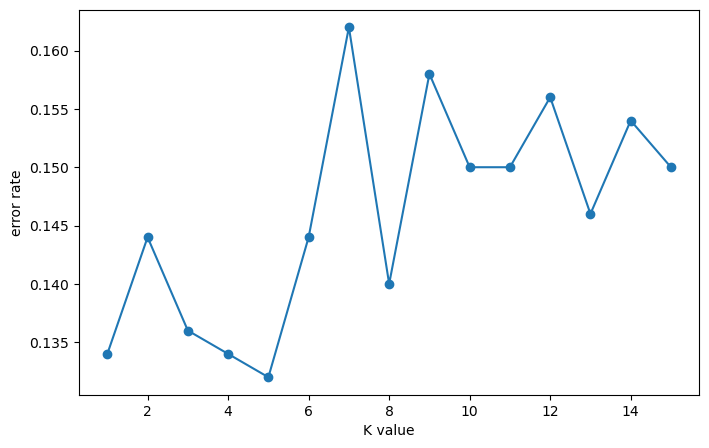

In [68]:
plot_error_rates(k_values, error_rates)

整体错误率在 0.13~0.16 之间浮动，表现稳定;  
当 K 较小（1~5）时，模型精度更高，K=5 时错误率最低 (≈0.132)；  
当 K 继续增大时，错误率缓慢上升，说明邻居数量太多导致“平均化”效应，边界被模糊；  
这种趋势与理论一致：  
小 K ⇒ 对局部模式敏感，容易过拟合；  
大 K ⇒ 平滑效果增强，泛化好但容易欠拟合。  

-------------
接下来看看CIFAR

In [45]:
# 还是一样抽样
X_cifar_train_sub = X_cifar_train[:2500]
y_cifar_train_sub = y_cifar_train[:2500]
X_cifar_test_sub = X_cifar_test[:1000]
y_cifar_test_sub = y_cifar_test[:1000]


In [46]:
#标准化
scaler_cifar = StandardScaler()
X_cifar_train_scaled = scaler_cifar.fit_transform(X_cifar_train_sub)
X_cifar_test_scaled = scaler_cifar.transform(X_cifar_test_sub)

In [49]:
k_values, error_rates = calculate_error_rates(X_cifar_train_scaled, y_cifar_train_sub, X_cifar_test_scaled, y_cifar_test_sub, max_k=15)

k=1: 错误率=0.7590
k=2: 错误率=0.7880
k=3: 错误率=0.7510
k=4: 错误率=0.7650
k=5: 错误率=0.7540
k=6: 错误率=0.7490
k=7: 错误率=0.7440
k=8: 错误率=0.7440
k=9: 错误率=0.7360
k=10: 错误率=0.7360
k=11: 错误率=0.7420
k=12: 错误率=0.7430
k=13: 错误率=0.7440
k=14: 错误率=0.7450
k=15: 错误率=0.7390


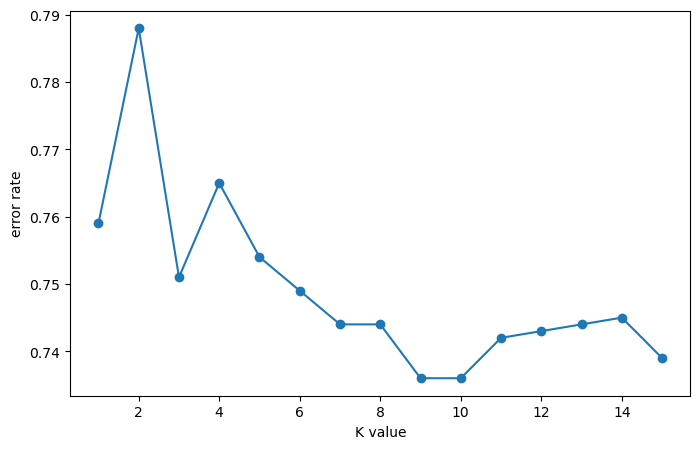

In [50]:
plot_error_rates(k_values, error_rates)

在原始像素空间上，KNN 算法的分类错误率较高（约 0.74~0.76），说明基于像素的欧氏距离无法有效刻画图像的类别相似性。随着 K 值的增大，错误率略有下降，表明增加邻居数量有助于平滑噪声样本的影响，但整体提升有限。
造成错误率偏高的主要原因包括：

CIFAR-10 样本为高维彩色图像（3072 维），存在维度灾难；

原始像素特征缺乏语义信息，无法反映物体的形状与类别；

KNN 属于基于实例的懒惰学习算法，在高维数据上性能下降。
若使用 PCA 降维或深度特征替代原始像素，KNN 的表现将显著改善。

------------------------
最后试一个遥感的吧 UCM

In [61]:
from sklearn.utils import shuffle
X_ucm, y_ucm = shuffle(X_ucm, y_ucm, random_state=42)
print("Classes:", ucm_dataset.classes)
print("Num classes:", len(ucm_dataset.classes))
X_ucm_train, X_ucm_test, y_ucm_train, y_ucm_test = train_test_split(
    X_ucm, y_ucm, test_size=0.2, random_state=42, stratify=y_ucm
)

Classes: ['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']
Num classes: 21


In [62]:
scaler_ucm = StandardScaler()
X_ucm_train_scaled = scaler_ucm.fit_transform(X_ucm_train)
X_ucm_test_scaled = scaler_ucm.transform(X_ucm_test)

In [63]:
k_values, error_rates = calculate_error_rates(X_ucm_train_scaled, y_ucm_train, X_ucm_test_scaled, y_ucm_test, max_k=15)

k=1: 错误率=0.8095
k=2: 错误率=0.8262
k=3: 错误率=0.8310
k=4: 错误率=0.8500
k=5: 错误率=0.8405
k=6: 错误率=0.8476
k=7: 错误率=0.8500
k=8: 错误率=0.8595
k=9: 错误率=0.8571
k=10: 错误率=0.8571
k=11: 错误率=0.8619
k=12: 错误率=0.8643
k=13: 错误率=0.8667
k=14: 错误率=0.8690
k=15: 错误率=0.8643


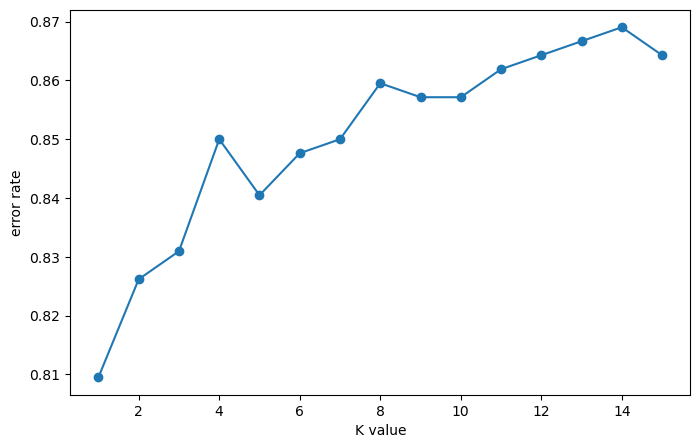

In [64]:
plot_error_rates(k_values, error_rates)

好吧也是错误率高的很，暂时没招了，接下来进行其他方面的测试

--------------

### 3.分析不同距离度量（distance metric）对错误率的影响

比较 KNN 在不同距离尺度下的表现，比如：  
欧式距离（Euclidean）  
曼哈顿距离（Manhattan）  
闵可夫斯基距离（Minkowski）  
余弦距离（Cosine）  
看看哪种距离对不同数据集更合适。

In [65]:
def compare_distance_metrics(X_train, y_train, X_test, y_test, k=3):
    metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine']
    results = {}
    for m in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=m)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error_rate = 1 - accuracy_score(y_test, y_pred)
        results[m] = error_rate
        print(f"{m} 距离的错误率: {error_rate:.4f}")
    return results

In [86]:
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False     # 正常显示负号

def plot_knn_distance_results(results, dataset_name="Dataset"):
    """
    绘制不同距离度量下的 KNN 错误率对比（固定 K）

    Parameters:
        results: dict
            key = 距离名称（如 "euclidean"）
            value = 错误率（单个数值）
        dataset_name: str
            数据集名称，用于标题
    """
    distances = list(results.keys())
    errors = list(results.values())

    plt.figure(figsize=(6, 4))
    plt.bar(distances, errors, color=['blue', 'orange', 'green', 'red'])
    
    for i, e in enumerate(errors):
        plt.text(i, e + 0.01, f"{e:.3f}", ha='center')  # 显示数值
    
    plt.ylim(0, max(errors) + 0.1)
    plt.ylabel("错误率")
    plt.title(f"{dataset_name} 数据集不同距离下的 KNN 错误率 (K=3)")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

接下来就对三个数据集测试吧：  
Sonar、MNIST还有CIFAR

In [71]:
# Sonar 数据集
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_Sonar = le.fit_transform(y_train_Sonar)
y_test_Sonar = le.transform(y_test_Sonar)
results_sonar = compare_distance_metrics(X_train_Sonar, y_train_Sonar, X_test_Sonar, y_test_Sonar, k=3)

euclidean 距离的错误率: 0.0794
manhattan 距离的错误率: 0.0635
minkowski 距离的错误率: 0.0794
cosine 距离的错误率: 0.0952


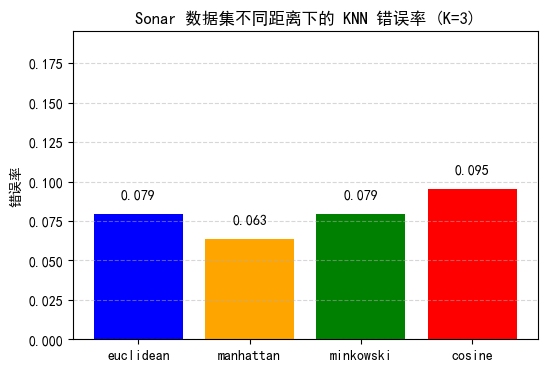

In [87]:
plot_knn_distance_results(results_sonar, dataset_name="Sonar")

In [92]:
# MNIST 数据集
results_mnist = compare_distance_metrics(X_mnist_train, y_mnist_train, X_mnist_test, y_mnist_test, k=3)


euclidean 距离的错误率: 0.1360
manhattan 距离的错误率: 0.1020
minkowski 距离的错误率: 0.1360
cosine 距离的错误率: 0.1340


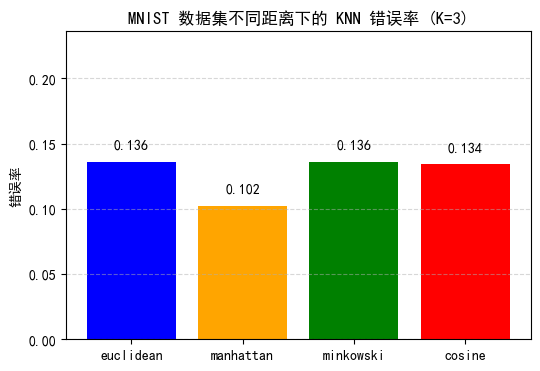

In [94]:
plot_knn_distance_results(results_mnist, dataset_name="MNIST")

In [95]:
# CIFAR 数据集
results_cifar = compare_distance_metrics(X_cifar_train_scaled, y_cifar_train_sub, X_cifar_test_scaled, y_cifar_test_sub, k=3)

euclidean 距离的错误率: 0.7510
manhattan 距离的错误率: 0.7210
minkowski 距离的错误率: 0.7510
cosine 距离的错误率: 0.7250


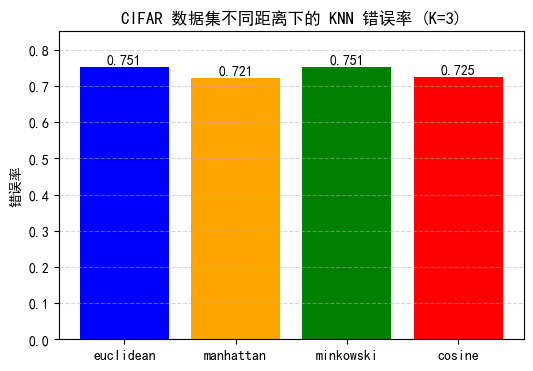

In [96]:
plot_knn_distance_results(results_cifar, dataset_name="CIFAR")

固定 K=3 时，不同数据集的 KNN 错误率对距离度量敏感：小维度数据集（如 Sonar、MNIST）和高维图像数据集（如 CIFAR）均显示曼哈顿距离表现最好，说明在本实验中曼哈顿距离对不同特征空间更稳健。

------------------
# 总结一下

### 从上面实验可以看出，三个方面：  
1.当K取不同值时，K近邻的错误率通常是先下降后上升。  
2.当样本维度太高时，如CIFAR和UCM数据集，K近邻在图像这种高维原始特征上表现很差。
3.不同距离尺度也会影响错误率，在本次实验中，选曼哈顿距离作为距离尺度时模型表现最佳